# 케라스의 texts_to_matrix()

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts) # 토크나이저 수행; 정수 인코딩
print(tokenizer.word_index) # 가장 많이 출현한 단어순으로 내림차순

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [4]:
print(tokenizer.texts_to_matrix(texts, mode='count')) # 각 단어 인덱스에 해당하는 단어의 출현빈도; binary, count, freq, tfidf

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [ ]:
print(tokenizer.texts_to_matrix(texts, mode='binary')) # 해당 단어가 존재하는지만 관심

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [5]:
print(tokenizer.texts_to_matrix(texts, mode='tfidf').round(2))

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


In [6]:
print(tokenizer.texts_to_matrix(texts, mode='freq').round(2)) # 각 문서에서 각 단어의 등장 횟수를 분자로, 각 문서의 크기를 분모로 표현하는 방식

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


# 20개 뉴스 그룹(Twenty Newsgroups) 데이터에 대한 이해

사이킷런에서 20개의 다른 주제를 가진 18,846개의 뉴스 그룹 이메일 데이터를 제공<br><br>

이메일 내용(=data)를 보고 어떤 주제(=target)인지 맞춰보자

In [11]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [12]:
newsdata = fetch_20newsgroups(subset='train') # 'train'을 기재하면 훈련 데이터만 리턴한다.

In [13]:
print(newsdata.keys()) # 6개의 데이터 중 data(이메일본문), target(주제 숫자값) 만 사용

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [17]:
print('size of train sample: {}'.format(len(newsdata.data))) # train data 개수

size of train sample: 11314


In [19]:
print('size of subject: {}'.format(len(newsdata.target_names))) # 총 주제(=target)의 개수
print(newsdata.target_names) # 20개 target의 실제 이름

size of subject: 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [46]:
print('firtst label of the sample: {}'.format(newsdata.target[0])) # 0번째 데이터의 target

firtst label of the sample: 7


In [49]:
print('the subject of the 7th label: {}'.format(newsdata.target_names[7])) # 7번 target에 대한 실제 이름

the subject of the 7th label: rec.autos


In [22]:
print(newsdata.data[0]) # 첫번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [23]:
# "data"로부터 데이터프레임화
data = pd.DataFrame(newsdata.data, columns=['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]
# "email"은 features, "target"은 정답 label

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [25]:
data.isnull().values.any() # null 값 체크

False

In [26]:
print('number of unique targets: {}'.format(data['target'].nunique())) # 중복 없이 전체 "target"의 수
print('number of unique email: {}'.format(data['email'].nunique())) # 중복 없이 전체 "email"의 수

number of unique targets: 20
number of unique email: 11314


<Axes: xlabel='target'>

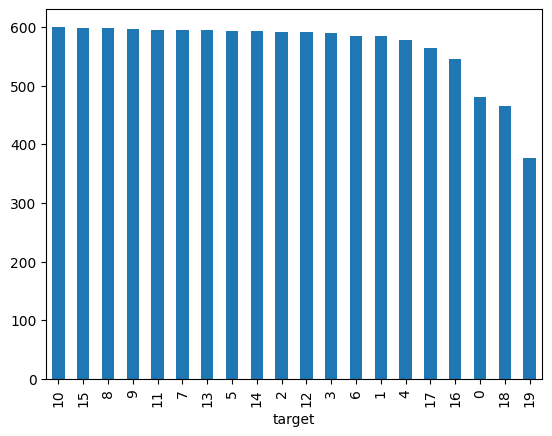

In [28]:
data['target'].value_counts().plot(kind='bar')

In [30]:
print(data.groupby('target').size().reset_index(name='count')) # 각 레이블의 개수

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [33]:
# 훈련용 데이터
train_email = data['email']
train_label = data['target']

# 테스트용 데이터
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
test_email = newsdata_test.data
test_label = newsdata_test.target

In [34]:
max_words = 10000 # 빈도수 우선순위로 10000개의 단어만 사용
num_classes = 20

In [35]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    tokenizer = Tokenizer(num_words=max_words) # max_words 개수만큼의 단어만 사용한다.
    tokenizer.fit_on_texts(train_data) # 정수 인코딩
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode) # 샘플 수 x max_words 크기의 행렬 생성
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode) # 샘플 수 x max_words 크기의 행렬 생성
    return X_train, X_test, tokenizer.index_word

In [36]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary')
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [38]:
print('size of train samples: {}'.format(X_train.shape))
print('size of train labels: {}'.format(y_train.shape))
print('size of test samples: {}'.format(X_test.shape))
print('size of test labels: {}'.format(y_test.shape))

size of train samples: (11314, 10000)
size of train labels: (11314, 20)
size of test samples: (7532, 10000)
size of test labels: (7532, 20)


In [39]:
print('first priority of word: {}'.format(index_to_word[1]))
print('last priority of word: {}'.format(index_to_word[9999]))

first priority of word: the
last priority of word: mic


# 다층 퍼셉트론(Multilayer Perceptron, MLP)을 사용하여 텍스트 분류하기

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [42]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(max_words,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]


In [43]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 휸련하고 평가
    print(mode + ' accuracy:', score)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.2017 - loss: 2.6873 - val_accuracy: 0.8286 - val_loss: 0.9109
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.7287 - loss: 0.9820 - val_accuracy: 0.9002 - val_loss: 0.4316
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.8850 - loss: 0.4470 - val_accuracy: 0.9046 - val_loss: 0.3276
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.9381 - loss: 0.2522 - val_accuracy: 0.9090 - val_loss: 0.2951
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9570 - loss: 0.1726 - val_accuracy: 0.9170 - val_loss: 0.2873
binary accuracy: 0.8230217695236206
Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.1487 - loss: 3.1273 - val_accuracy: 0.7456 - val_loss: 1.5781
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.5772 - loss: 1.6281 - val_accuracy: 0.8489 - val_loss: 0.7030
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.7969 - loss: 0.81